In [ ]:
import pandas as pd
df = pd.read_csv("Cancer_Data.csv")

# About the dataset

The Dataset is collected from kaggle . where the dataset contains informations about cancer patients and all their health condition to findout that he/she needs diagonosis or not.

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# we drop the columns that are not related with cancer syntom

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1, inplace= True)

In [ ]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Goal

our main goal is to build such a predictive model by using the dataset which we collected from kaggle where we can classify that wheather the tumor is malignant or benign.Support Vector Machine (SVM) finds the optimal hyperplane which divide the data into different classes.

# Feature Engineering & Visualization

In [ ]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='diagnosis'>

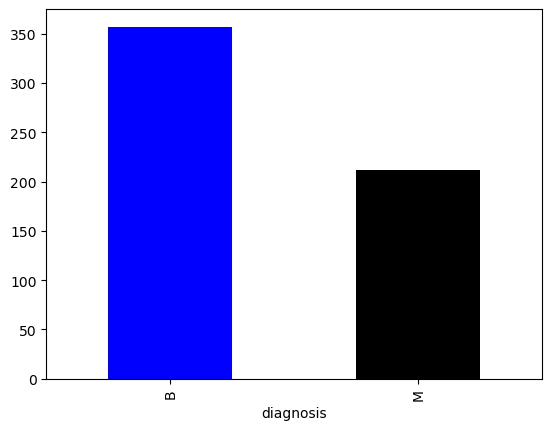

In [ ]:
df.diagnosis.value_counts().plot.bar(color=['blue', 'black'])


In [ ]:
# check which columns are the categorical value
new = (df.dtypes== "object")
name = list(new[new].index)

In [ ]:
print(name)

['diagnosis']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode= OrdinalEncoder()

df["diagnosis"]=encode.fit_transform(df[["diagnosis"]])


In [ ]:
df["diagnosis"].value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

In [ ]:
#correlation check
cor = df.corr()

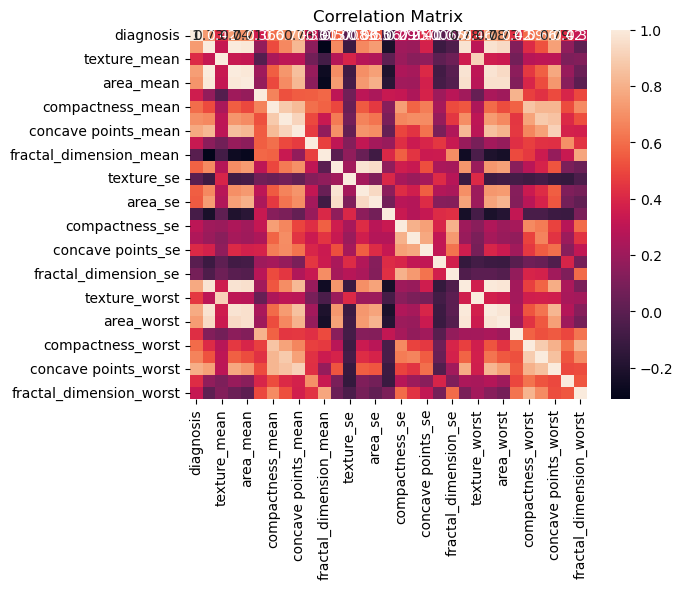

In [ ]:
import seaborn as sns
sns.heatmap(cor, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
features = df.corr()['diagnosis'].sort_values()
features

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [ ]:
high_corr_features = features[features >= 0.5].index
high_corr_features

Index(['area_se', 'perimeter_se', 'radius_se', 'compactness_worst',
       'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
       'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
       'concave points_mean', 'perimeter_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')

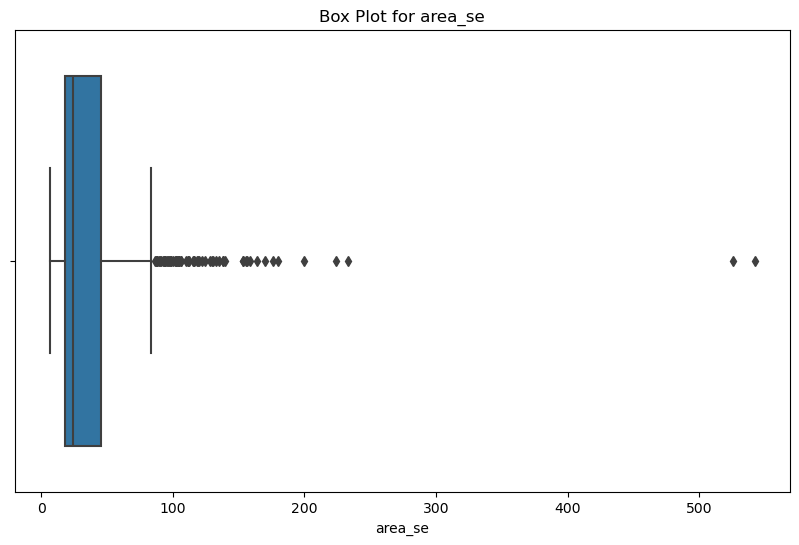

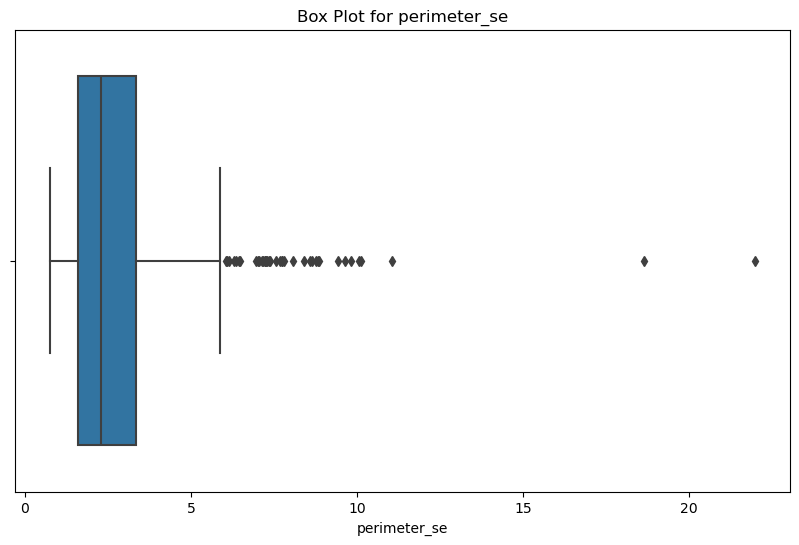

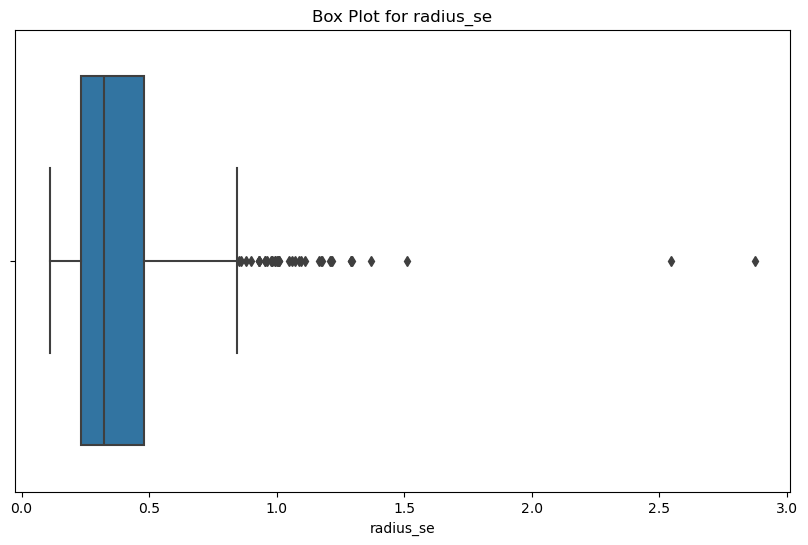

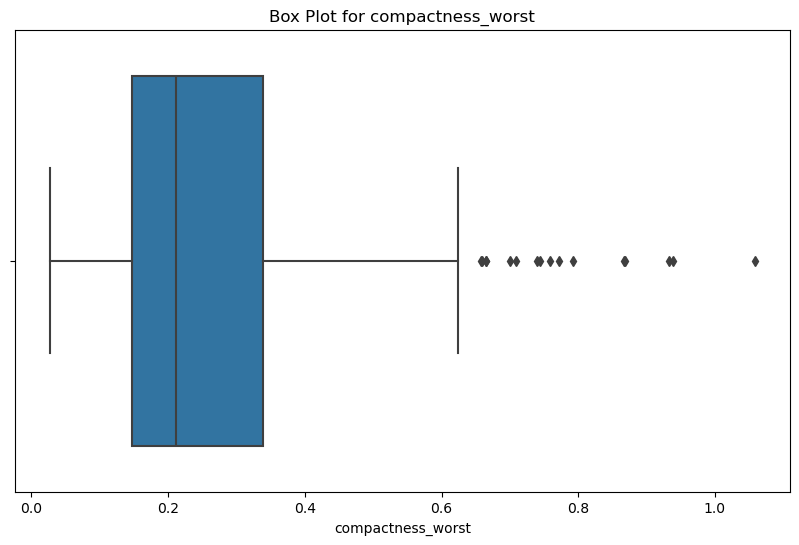

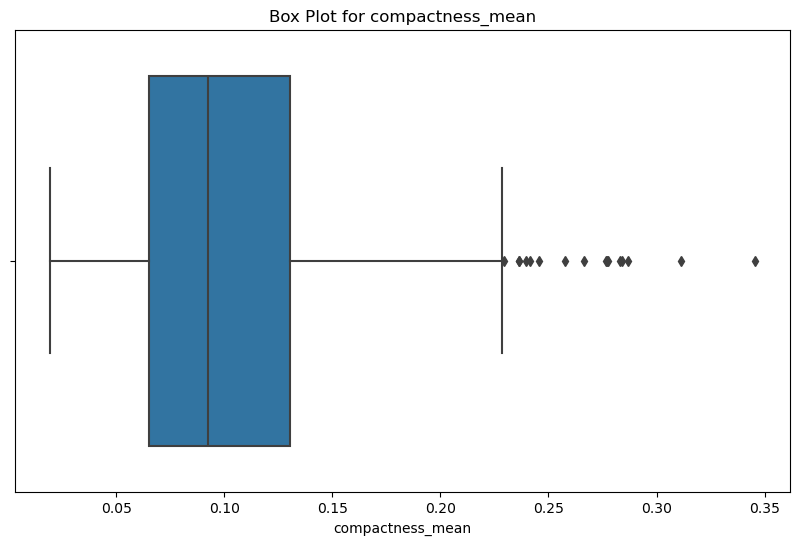

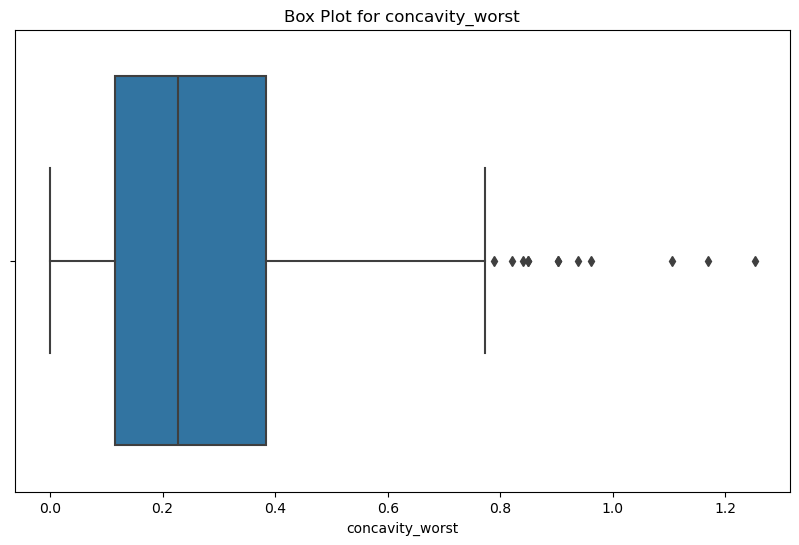

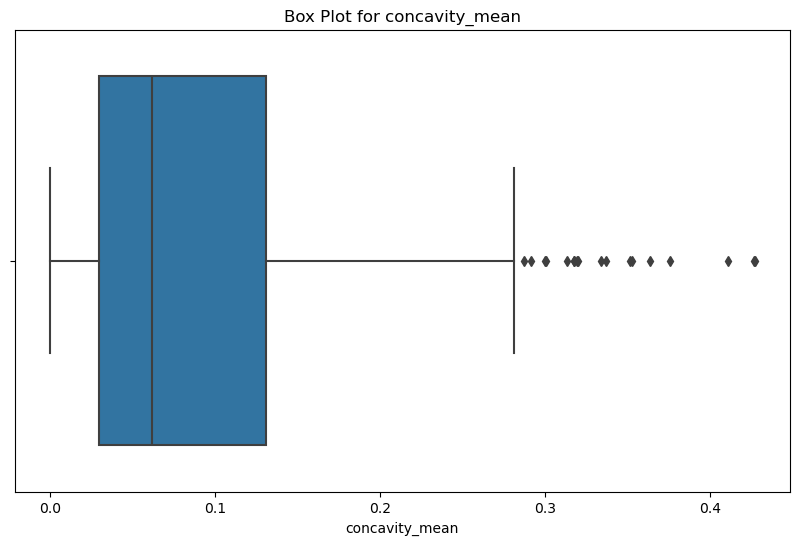

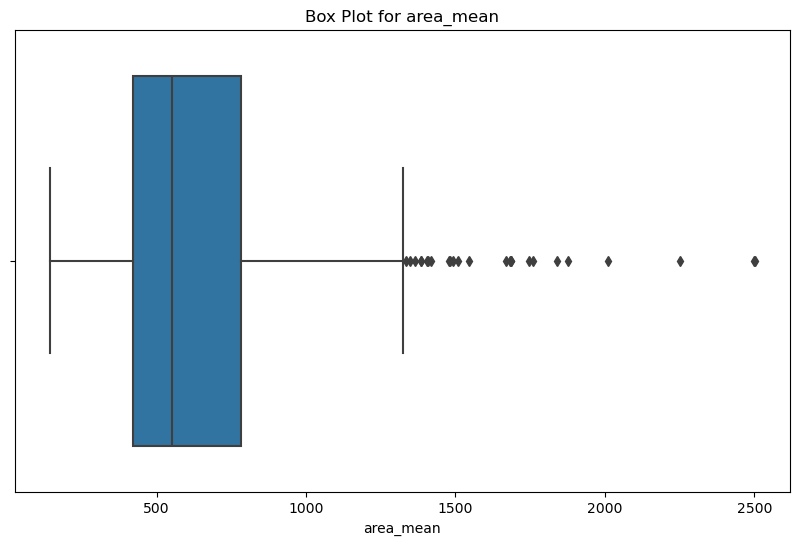

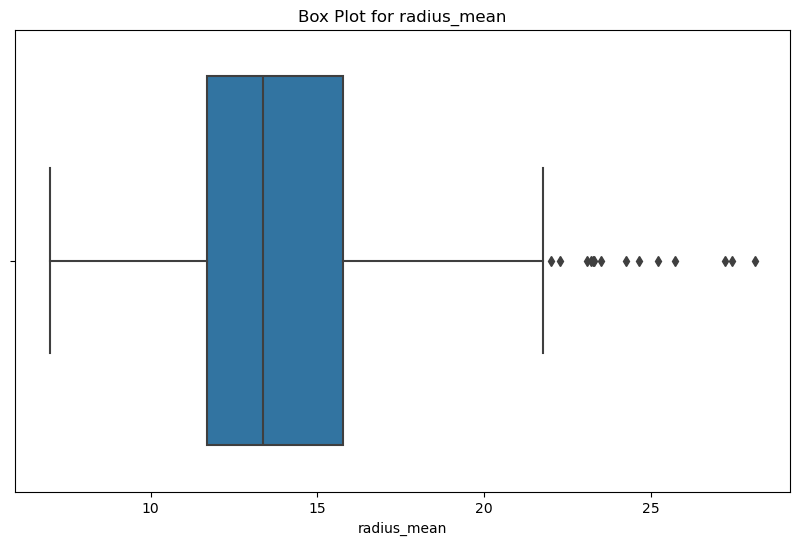

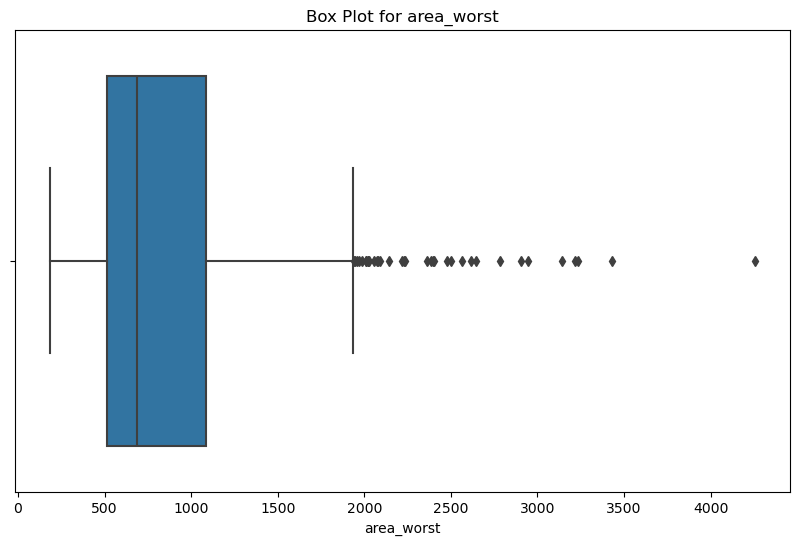

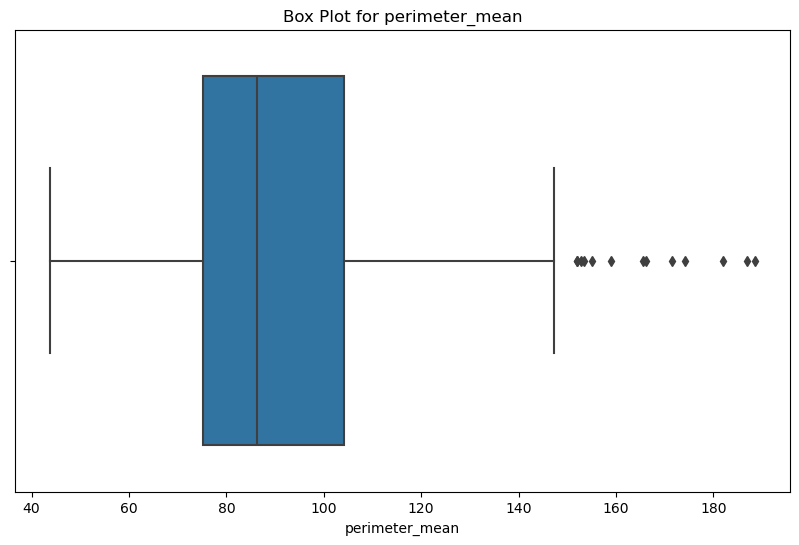

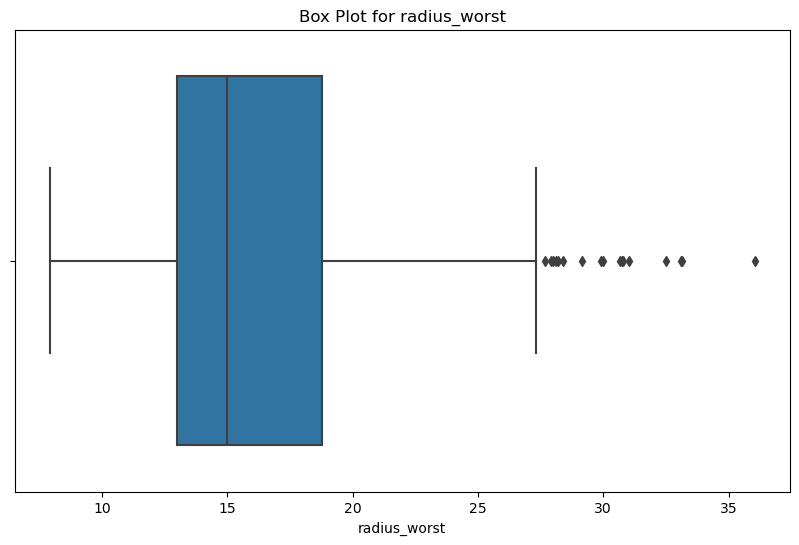

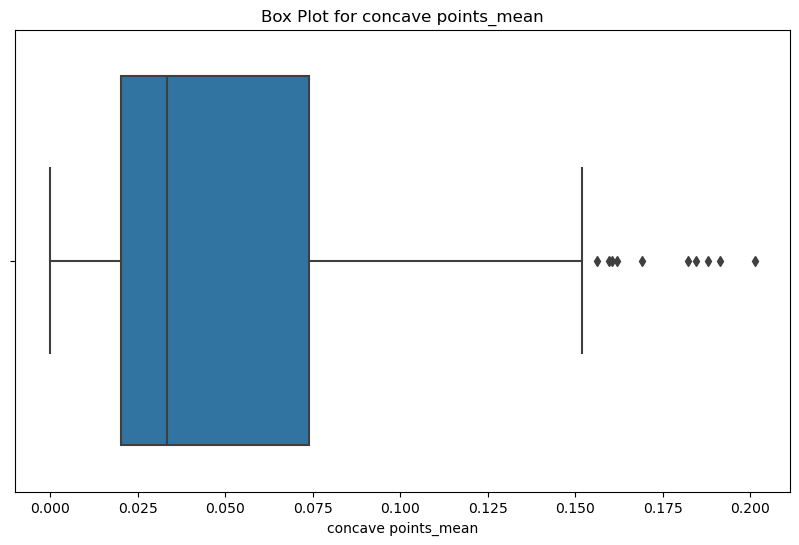

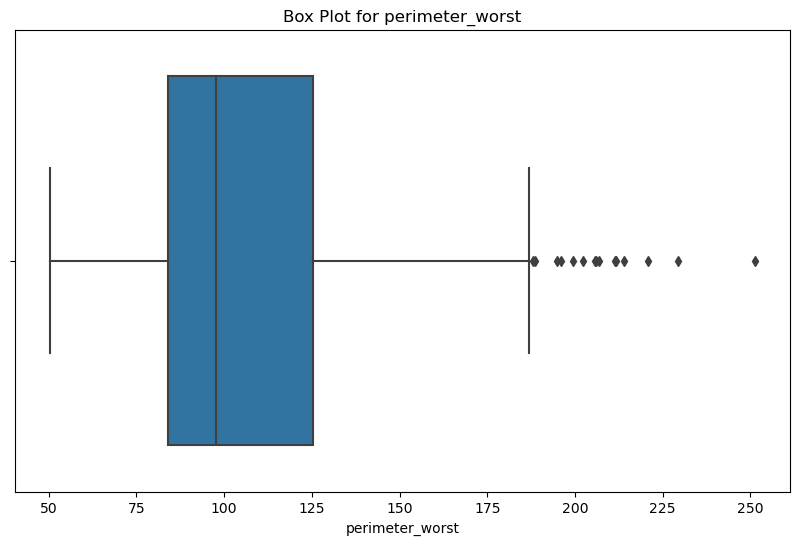

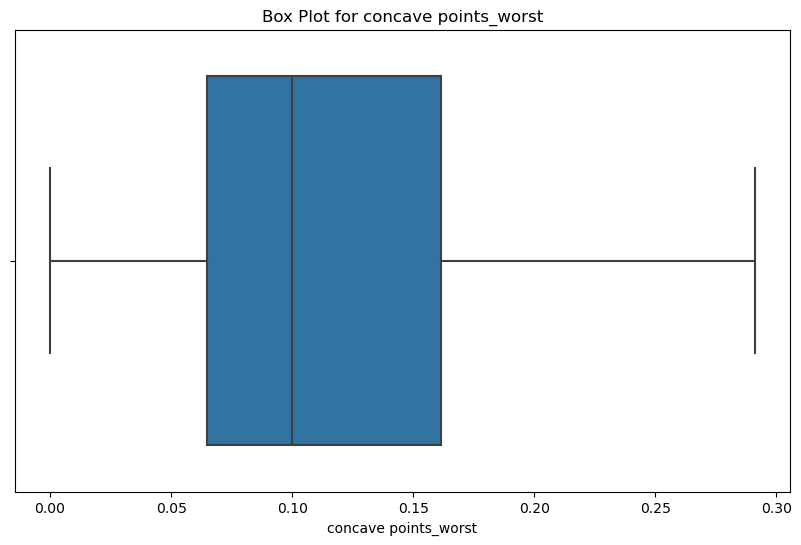

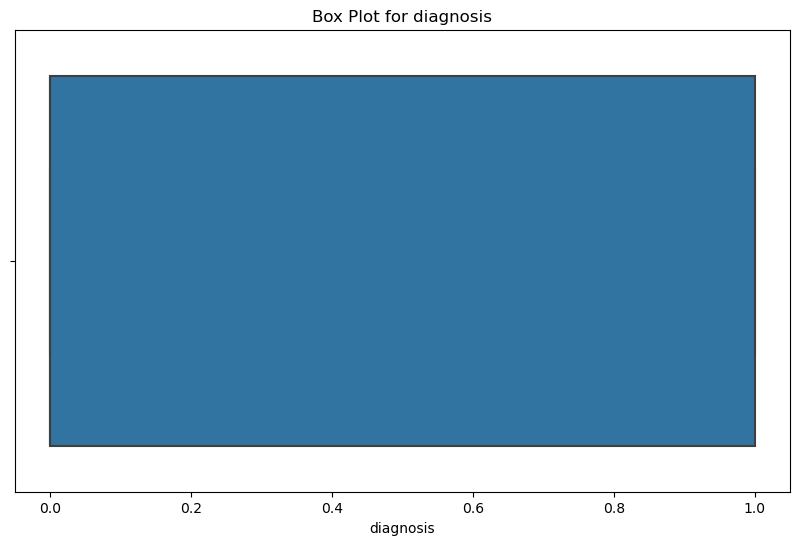

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Filter out non-numeric columns from high_corr_features
high_corr_features = [col for col in high_corr_features if col in numeric_cols]

for column in high_corr_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
def fix_outliers_iqr(labeled_data, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    labeled_data[column] = df[column].clip(lower_bound, upper_bound)
    return labeled_data

# Fix outliers in "area_se" column
labeled_data = fix_outliers_iqr(df, 'area_se')

# Fix outliers in 'parameter_se' column
labeled_data = fix_outliers_iqr(df, 'perimeter_se')

# Fix outliers in 'radius_se' column
labeled_data = fix_outliers_iqr(df, 'radius_se')

# Fix outliers in 'compactness_worst' column
labeled_data = fix_outliers_iqr(df, 'compactness_worst')

# Fix outliers in 'compactness_mean' column
labeled_data = fix_outliers_iqr(df, 'compactness_mean')

# Fix outliers in 'concavity_worst' column
labeled_data = fix_outliers_iqr(df, 'concavity_worst')

# Fix outliers in "concavity_mean" column
labeled_data = fix_outliers_iqr(df, 'concavity_mean')

# Fix outliers in 'area_mean' column
labeled_data = fix_outliers_iqr(df, 'area_mean')

# Fix outliers in 'radius_mean' column
labeled_data = fix_outliers_iqr(df, 'radius_mean')

# Fix outliers in 'area_worst' column
labeled_data = fix_outliers_iqr(df, 'area_worst')

# Fix outliers in 'perimeter_mean' column
labeled_data = fix_outliers_iqr(df, 'perimeter_mean')

# Fix outliers in 'radius_worst' column
labeled_data = fix_outliers_iqr(df, 'radius_worst')

# Fix outliers in 'concave points_mean' column
labeled_data = fix_outliers_iqr(df, 'concave points_mean')

# Fix outliers in 'perimeter_worst' column
labeled_data = fix_outliers_iqr(df, 'perimeter_worst')

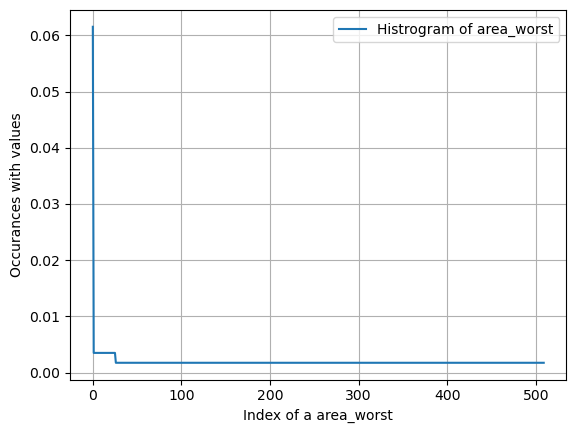

In [ ]:
import matplotlib.pyplot as plt
area_worst = df["area_worst"].value_counts()
s = sum(area_worst.values);
h = area_worst.values/s;
plt.plot(h, label="Histrogram of area_worst")
plt.xlabel('Index of a area_worst')
plt.ylabel('Occurances with values')
plt.legend()
plt.grid()
plt.show()


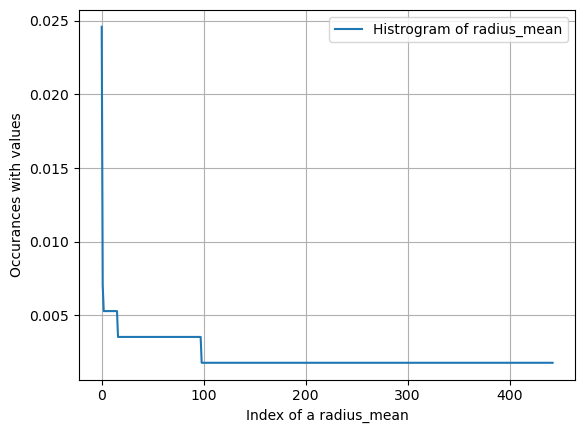

In [ ]:
radius_mean = df["radius_mean"].value_counts()
s = sum(radius_mean.values);
h = radius_mean.values/s;
plt.plot(h, label="Histrogram of radius_mean")
plt.xlabel('Index of a radius_mean')
plt.ylabel('Occurances with values')
plt.legend()
plt.grid()
plt.show()

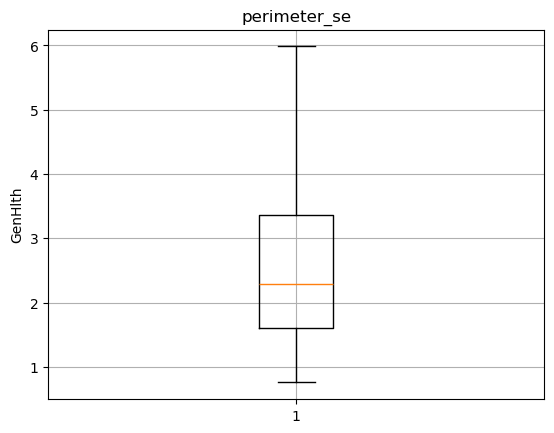

In [ ]:
plt.boxplot(labeled_data['perimeter_se'])
plt.title('perimeter_se')
plt.ylabel('GenHlth')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.22862,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.70,0.2098,0.62695,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.2364,0.07678


# separate Dataset

In [ ]:
x = df.drop("diagnosis", axis=1)

In [ ]:
y= df["diagnosis"]

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.22862,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.70,0.2098,0.62695,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: diagnosis, dtype: float64

# Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20, random_state= 42)

In [ ]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.28241,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.70,0.14820,0.43650,0.78550,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.22862,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,1937.05,0.14910,0.62695,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.10,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.70,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.60,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [ ]:
ytrain.head()

68     0.0
181    1.0
63     0.0
248    0.0
60     0.0
Name: diagnosis, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#lis= [100,200,300,400]
#estima =[100,50,150,200]

for i in range(10,20):
    for j in range(100,120):
        print("the estimetor is : " ,i)
        clf= RandomForestClassifier(max_depth= i, random_state= 40, n_estimators= j)
        clf.fit(xtrain,ytrain)
        print("the score of train and test result")
        print("train score is: ",clf.score(xtrain,ytrain))
        print("test score is : ", clf.score(xtest,ytest))

        ypred = clf.predict(xtest)
        print("The test score based on prediction value is : ")

        test_score = clf.score(xtest, ypred)
        print("Test score is : ", test_score)

the estimetor is :  10
the score of train and test result
train score is:  1.0
test score is :  0.9649122807017544
The test score based on prediction value is : 
Test score is :  1.0
the estimetor is :  10
the score of train and test result
train score is:  1.0
test score is :  0.9649122807017544
The test score based on prediction value is : 
Test score is :  1.0
the estimetor is :  10
the score of train and test result
train score is:  1.0
test score is :  0.9649122807017544
The test score based on prediction value is : 
Test score is :  1.0
the estimetor is :  10
the score of train and test result
train score is:  1.0
test score is :  0.9649122807017544
The test score based on prediction value is : 
Test score is :  1.0
the estimetor is :  10
the score of train and test result
train score is:  1.0
test score is :  0.9649122807017544
The test score based on prediction value is : 
Test score is :  1.0
the estimetor is :  10
the score of train and test result
train score is:  1.0
test s

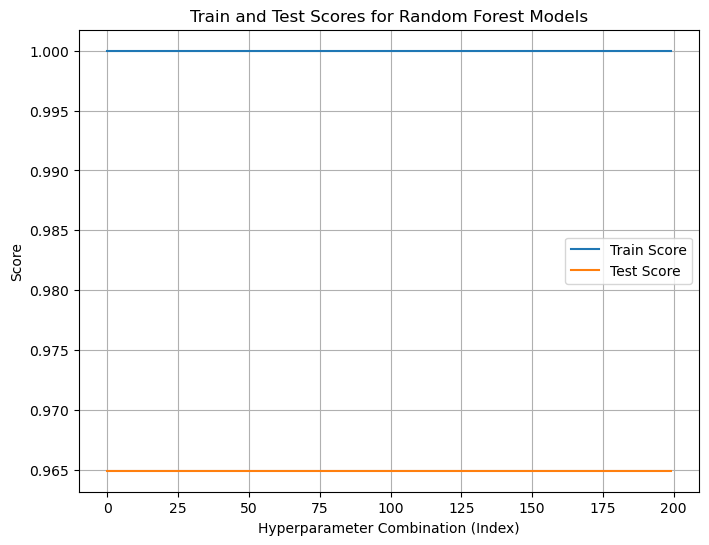

In [ ]:
train_scores = []
test_scores = []
for i in range(10,20):
    for j in range(100,120):
        clf = RandomForestClassifier(max_depth=i, random_state=40, n_estimators=j)
        clf.fit(xtrain, ytrain)

        train_scores.append(clf.score(xtrain, ytrain))
        test_scores.append(clf.score(xtest, ytest))

plt.figure(figsize=(8, 6))
plt.plot(train_scores, label='Train Score')
plt.plot(test_scores, label='Test Score')
plt.xlabel('Hyperparameter Combination (Index)')
plt.ylabel('Score')
plt.title('Train and Test Scores for Random Forest Models')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.22862,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.70,0.2098,0.62695,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()

In [ ]:
x_new= rc.fit_transform(x)

In [ ]:
x_new

array([[ 1.13235294, -1.5026643 ,  1.26374006, ...,  1.71524826,
         2.63555556,  1.88457808],
       [ 1.76470588, -0.19005329,  1.61285862, ...,  0.89219446,
        -0.10666667,  0.43549952],
       [ 1.54901961,  0.42806394,  1.51261666, ...,  1.48305173,
         1.17185185,  0.3656644 ],
       ...,
       [ 0.79166667,  1.64120782,  0.76253025, ...,  0.43402094,
        -0.89481481, -0.08923375],
       [ 1.77205882,  1.86323268,  1.86173522, ...,  1.7111019 ,
         1.87407407,  2.13191077],
       [-1.375     ,  1.01243339, -1.32457656, ..., -1.03586607,
         0.07259259, -0.46799224]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y, test_size=.20, random_state= 42)

In [ ]:
#!pip install xgboost
!pip install catboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


import numpy as np  # For potential array manipulations (if needed)

def evaluate_classifiers(classifiers, lis, estima, x_train, x_test, y_train, y_test):
    for clf_class in classifiers:
        clf_name = clf_class.__name__  # Extract classifier name for clarity
        print(f"\nEvaluating {clf_name}:")

        clf = clf_class(random_state=40, **{  # Use dictionary for additional parameters
       })
        clf.fit(xtrain, ytrain)

        print("-" * 40)  # Optional separator for clarity


        print("Train score:", clf.score(xtrain, ytrain))
        print("Test score:", clf.score(xtest, ytest))

        # Optional: Predicted labels (if needed)
        ypred = clf.predict(xtest)
        print("Test score based on prediction value:", clf.score(xtest, ypred))  # Not relevant score (uncomment if needed)


classifiers = [ AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier, CatBoostClassifier]

evaluate_classifiers(classifiers, lis, estima, xtrain, ytrain, xtest, ytest)


Evaluating AdaBoostClassifier:
----------------------------------------
Train score: 1.0
Test score: 0.9736842105263158
Test score based on prediction value: 1.0

Evaluating GradientBoostingClassifier:
----------------------------------------
Train score: 1.0
Test score: 0.956140350877193
Test score based on prediction value: 1.0

Evaluating XGBClassifier:
----------------------------------------
Train score: 1.0
Test score: 0.956140350877193
Test score based on prediction value: 1.0

Evaluating CatBoostClassifier:
Learning rate set to 0.00736
0:	learn: 0.6826275	total: 139ms	remaining: 2m 19s
1:	learn: 0.6733672	total: 144ms	remaining: 1m 11s
2:	learn: 0.6604397	total: 148ms	remaining: 49.3s
3:	learn: 0.6500649	total: 153ms	remaining: 38s
4:	learn: 0.6416236	total: 157ms	remaining: 31.2s
5:	learn: 0.6304941	total: 162ms	remaining: 26.8s
6:	learn: 0.6180614	total: 166ms	remaining: 23.6s
7:	learn: 0.6071733	total: 171ms	remaining: 21.2s
8:	learn: 0.5968247	total: 175ms	remaining: 19.2s